# Analytical Benchmarks - 2D Cartesian Sinusoidal

In [1]:
#import and initialisation
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
init_printing()
%matplotlib inline

In [2]:
#define the symbols used in the derivation
x,y,rho,C1,Cx,Cy,gx,mu,gy= symbols( 'x y rho C1 C_x C_y g_x mu g_y')
rhox, rhoy, tau_xx, tau_xy, tau_yx, tau_yy = symbols("rho_x rho_y tau_{xx} tau_{xy} tau_{yx} tau_{yy}")
vx,vy = symbols('v_x v_y',function=True)
p = symbols('p',function=True)

Firstly, we define the continuity (mass conservation) equation and the momentum equation in 1D, as well as the 1D stress tensor ($\tau$):

In [3]:
def get_continuity_equation_x(vx,rhox):
    return (1/vx)*Derivative(vx,x) + (1/rhox)*diff(rhox,x)

In [4]:
def get_continuity_equation_y(vy,rhoy):
    return (1/vy)*Derivative(vy,y) + (1/rhoy)*diff(rhoy,y)

In [5]:
def get_velocity_divergence(vx,vy):
    return Derivative(vx,x) + Derivative(vy,y)

In [6]:
def get_tau_xx():
    div = get_velocity_divergence(vx,vy)
    return 2*mu*Derivative(vx,x) - mu*div*Rational(2,3)

In [7]:
def get_tau_yy():
    div = get_velocity_divergence(vx,vy)
    return 2*mu*Derivative(vy,y) - mu*div*Rational(2,3)

In [8]:
def get_tau_xy():
    return mu*(Derivative(vx,y) + Derivative(vy,x))

In [9]:
def get_tau_yx():
    return get_tau_xy()

In [10]:
def get_momentum_equation_x(p):
    return -Derivative(p,x) + rho*gx + Derivative(tau_xx,x).doit() + Derivative(tau_xy,y).doit()

In [11]:
def get_momentum_equation_y(p):
    return -Derivative(p,y) + rho*gy + Derivative(tau_yx,x).doit() + Derivative(tau_yy,y).doit()

Next we prescibe the density profile, and then get the continuity equation, in both x and y directions:

In [12]:
rhox=cos(x)
rhoy=cos(y)
rho=rhox*rhoy

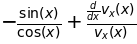

In [13]:
continuity_equation_x = get_continuity_equation_x(vx(x),rhox)
continuity_equation_x

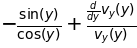

In [14]:
continuity_equation_y = get_continuity_equation_y(vy(y),rhoy)
continuity_equation_y

(Note that equations in Sympy are implicitly equal to zero)

Then, we solve the continuity equations for the velocity:

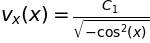

In [15]:
velocity_equation_x = dsolve(continuity_equation_x)
velocity_equation_x

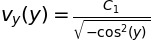

In [16]:
velocity_equation_y = dsolve(continuity_equation_y)
velocity_equation_y

Due to limitations with sympy, it finds an imaginary solution, whereas we need the real part. We therefore prescribe a real solution, then verify it:

In [17]:
vy = Cy/cos(y)
vx = Cx/cos(x)

In [18]:
get_continuity_equation_x(vx,rhox).doit()

In [19]:
get_continuity_equation_y(vy,rhoy).doit()

Next, we obtain the stress tensor $\tau$:

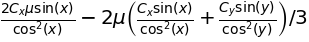

In [20]:
tau_xx = get_tau_xx()
tau_xx.doit()

In [21]:
tau_xy = get_tau_xy()
tau_xy.doit()

In [22]:
tau_yx = get_tau_yx()
tau_yx.doit()

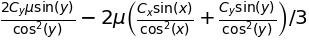

In [23]:
tau_yy = get_tau_yy()
tau_yy.doit()

Now, we prescibe the gravitational field:

In [24]:
gx = 1/cos(y)
gy = 1/cos(x)

Then, we obtain the momentum equation:

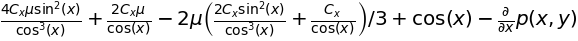

In [25]:
momentum_equation_x = get_momentum_equation_x(p(x,y))
momentum_equation_x

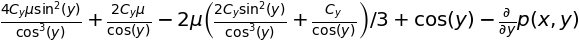

In [26]:
momentum_equation_y = get_momentum_equation_y(p(x,y))
momentum_equation_y

Next, we solve this differential equation (by integrating with respect to x) to give us an equation for the pressure:

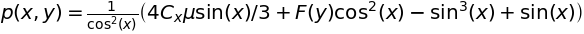

In [27]:
pressure_equation = pdsolve(momentum_equation_x)
pressure_equation

This equation features the unknown function F(y).
To find this function, we first differentiate both sides with respect to y:

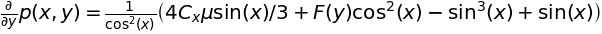

In [28]:
pressure_equation_derivative = Derivative(pressure_equation,y)
pressure_equation_derivative

We then substitute this equation for dp/dy into the y-dimension momentum equation:

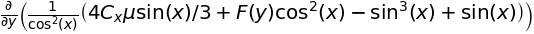

In [29]:
Derivative(pressure_equation.rhs,y)

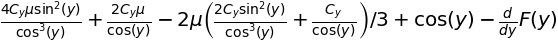

In [30]:
F_equation = momentum_equation_y.subs(Derivative(pressure_equation.lhs,y),
                         Derivative(pressure_equation.rhs,y)).doit()
F_equation

We then solve this equation for F, by integrating with respect to y:

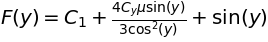

In [31]:
F_solved = dsolve(F_equation)
F_solved

We then substitute this equation for y into the previous pressure equation, thus giving us a final equation for the pressure:

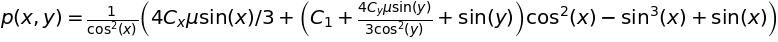

In [32]:
pressure_equation_final = pressure_equation.subs(F_solved.lhs,F_solved.rhs)
pressure_equation_final

We now have to perform a trigonometric substitution to neaten the solution, which Sympy cannot find itself

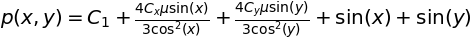

In [33]:
pressure_equation_final = pressure_equation_final.subs(-sin(x)**3+sin(x),sin(x)*cos(x)**2).expand()
pressure_equation_final

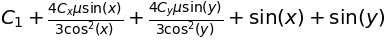

In [34]:
p = pressure_equation_final.rhs
p

We then perform two "sanity checks": we substitute the obtained equations into the continuity and momentum equations, which should then return zero:

In [35]:
get_momentum_equation_x(p).doit().expand()

In [36]:
get_momentum_equation_y(p).doit().expand()

In [37]:
get_continuity_equation_x(vx,rho).doit()

In [38]:
get_continuity_equation_y(vy,rho).doit()

Finally, we need to calculate the strain rate:

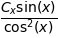

In [39]:
exx = Derivative(vx,x).doit()
exx

In [40]:
exy = Derivative(vx,y).doit()
exy

In [41]:
eyx = Derivative(vy,x).doit()
eyx

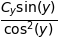

In [42]:
eyy = Derivative(vy,y).doit()
eyy

# Plotting

Firstly, we need to generate functions from the above expressions for density, velocity and pressure:

In [43]:
density_function = lambdify((x,y),rho)

In [44]:
vx_function = lambdify((x,y),vx.subs(Cx,1))

In [45]:
vy_function = lambdify((x,y),vy.subs(Cy,1))

In [46]:
def v_magnitude_function(x,y):
    return np.sqrt(vy_function(x,y)**2 + vx_function(x,y)**2)

In [47]:
pressure_function = lambdify((x,y),p.subs(C1,0).subs(Cx,1).subs(mu,1).subs(Cy,1))

In [48]:
exx_function = lambdify((x,y),exx.subs(Cx,1))

In [49]:
eyy_function = lambdify((x,y),eyy.subs(Cy,1))

Now we need an x range to plot over:


In [50]:
x_plotting = np.arange(-1.3,1.3,0.01)
y_plotting = np.arange(-1.3,1.3,0.01)
X_plotting,Y_plotting = np.meshgrid(x_plotting,y_plotting)

Finally, we plot the density, velocity and pressure profiles:

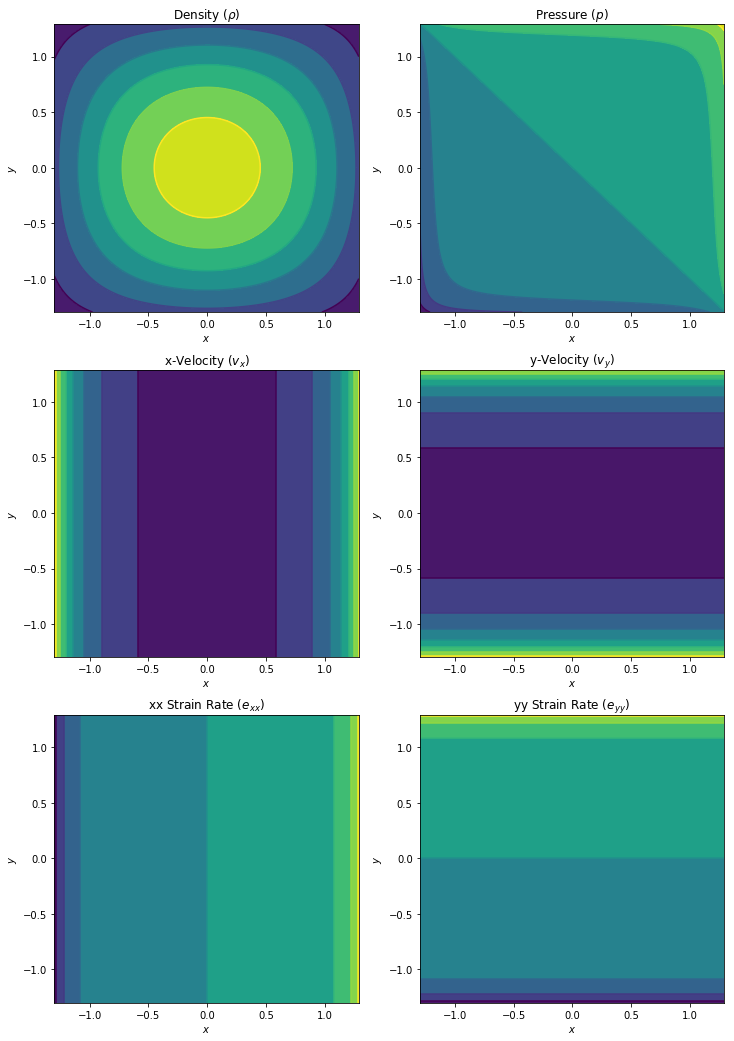

In [51]:
fig,axes = plt.subplots(3,2,figsize=(12,18))

axes[0,0].contourf(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].contour(X_plotting,Y_plotting,density_function(X_plotting,Y_plotting))
axes[0,0].set_xlabel("$x$")
axes[0,0].set_ylabel("$y$")
axes[0,0].set_title(r"Density ($\rho$)")

axes[0,1].contourf(X_plotting,Y_plotting,pressure_function(X_plotting,Y_plotting))
axes[0,1].contour(X_plotting,Y_plotting,pressure_function(X_plotting,Y_plotting))
axes[0,1].set_xlabel("$x$")
axes[0,1].set_ylabel("$y$")
axes[0,1].set_title(r"Pressure ($p$)")

axes[1,0].contourf(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].contour(X_plotting,Y_plotting,vx_function(X_plotting,Y_plotting))
axes[1,0].set_xlabel("$x$")
axes[1,0].set_ylabel("$y$")
axes[1,0].set_title(r"x-Velocity ($v_x$)")

axes[1,1].contourf(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].contour(X_plotting,Y_plotting,vy_function(X_plotting,Y_plotting))
axes[1,1].set_xlabel("$x$")
axes[1,1].set_ylabel("$y$")
axes[1,1].set_title(r"y-Velocity ($v_y$)")

axes[2,0].contourf(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].contour(X_plotting,Y_plotting,exx_function(X_plotting,Y_plotting))
axes[2,0].set_xlabel("$x$")
axes[2,0].set_ylabel("$y$")
axes[2,0].set_title(r"xx Strain Rate ($e_{xx}$)")

axes[2,1].contourf(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].contour(X_plotting,Y_plotting,eyy_function(X_plotting,Y_plotting))
axes[2,1].set_xlabel("$x$")
axes[2,1].set_ylabel("$y$")
axes[2,1].set_title(r"yy Strain Rate ($e_{yy}$)")

In [52]:
fig.savefig("2DCartesianSinusoidal.pdf")